<a href="https://colab.research.google.com/github/Qualot/deep-learning-from-scratch/blob/colab/ch04/loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

In [2]:
np.set_printoptions(linewidth=10000)

In [3]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

#Sum of squared error: 2乗和誤差
$$
  E = \sum_{k} \left(y_k - t_k \right)^2
$$

In [4]:
def sum_suared_error(y, t):
  return 0.5 * np.sum((np.array(y) - np.array(t))**2)

## When the softmax returns "2"


In [5]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
print(sum_suared_error(y, t))

0.09750000000000003


## When the softmax returns "7"


In [6]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
print(sum_suared_error(y, t))

0.5975


#Cross entrypy error: 交差エントロピー誤差
$$
  E = -\sum_{k} t_k \mathrm{log} \left(y_k \right)
$$

In [7]:
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t * np.log(y + delta) )

In [8]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338


In [9]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

2.302584092994546


In [10]:
t = np.array([2, 1, 0, 3])
# Calculate the number of classes
num_classes = np.max(t) + 1

# Create a one-hot label array using numpy's eye function
t_goal = np.eye(num_classes)[t]

print(t_goal)

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


# MNIST のロード

In [19]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

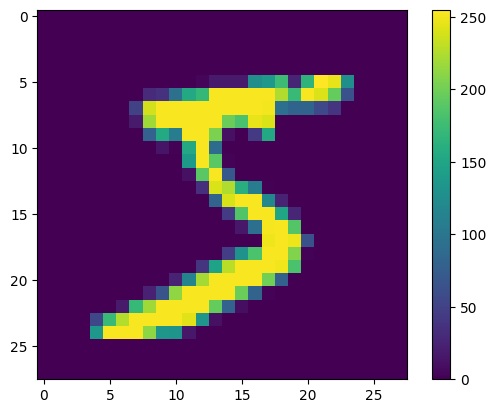

In [20]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [32]:
def get_data():
  #when using dataset library
  #  (x_train, t_train), (x_test, t_test) = mnist.load_data(normalize=True, flatten=True, one_hot_label=False)
  (x_train, t_train), (x_test, t_test) = mnist.load_data()

  #normalize
  x_train, x_test = x_train / 255.0, x_test / 255.0

  #flatten
  x_train, t_train, x_test, t_test = [arr.reshape(arr.shape[0], -1) for arr in (x_train, t_train, x_test, t_test)]

  #one-hot
  t_train = to_categorical(t_train)
  t_test = to_categorical(t_test)

  print(f"x_train.shape is ... {x_train.shape}")
  print(f"t_train.shape is ... {t_train.shape}")
  print(f"x_test.shape is ... {x_test.shape}")
  print(f"t_test.shape is ... {t_test.shape}")

  train_size = x_train.shape[0]
  batch_size = 10
  batch_mask = np.random.choice(train_size, batch_size)
  print(f"x_batch is ... {x_train[batch_mask]}")
  print()
  print(f"t_batch is ... {t_train[batch_mask]}")
  print()
  print()

  return x_test, t_test

In [33]:
x, t = get_data()
print(t[0])

x_train.shape is ... (60000, 784)
t_train.shape is ... (60000, 10)
x_test.shape is ... (10000, 784)
t_test.shape is ... (10000, 10)
x_batch is ... [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

t_batch is ... [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
